In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [144]:
train_data1 = pd.read_csv('train_data/train_task_1_2.csv')
val_data1 = pd.read_csv('test_data/test_public_answers_task_1.csv')
test_data1 = pd.read_csv('test_data/test_private_answers_task_1.csv')
m_data_a1 = pd.read_csv('metadata/answer_metadata_task_1_2.csv')
m_data_q1 = pd.read_csv('metadata/question_metadata_task_1_2.csv')
m_data_s1 = pd.read_csv('metadata/student_metadata_task_1_2.csv')


In [146]:
train_data1.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,16997,65967,12453206,0,4,2
1,16531,62121,15686710,1,1,1
2,15911,50013,13598796,0,3,1
3,1701,104909,10511925,0,4,3
4,22896,21748,941747,0,1,4


In [147]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15867850 entries, 0 to 15867849
Data columns (total 6 columns):
 #   Column         Dtype
---  ------         -----
 0   QuestionId     int64
 1   UserId         int64
 2   AnswerId       int64
 3   IsCorrect      int64
 4   CorrectAnswer  int64
 5   AnswerValue    int64
dtypes: int64(6)
memory usage: 726.4 MB


In [148]:
correlation_matrix = train_data1.corr()
correlation_with_target = correlation_matrix['IsCorrect'].sort_values(ascending=False)
correlation_matrix

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
QuestionId,1.000000,-0.000170,-0.000150,0.000642,0.008882,0.001107
UserId,-0.000170,1.000000,-0.000060,0.002105,-0.000090,0.000228
AnswerId,-0.000150,-0.000060,1.000000,-0.000450,0.000100,-0.000011
IsCorrect,0.000642,0.002105,-0.000450,1.000000,-0.010002,0.006604
CorrectAnswer,0.008882,-0.000090,0.000100,-0.010002,1.000000,0.528478
AnswerValue,0.001107,0.000228,-0.000011,0.006604,0.528478,1.000000


In [150]:
train_data1.columns

Index(['QuestionId', 'UserId', 'AnswerId', 'IsCorrect', 'CorrectAnswer',
       'AnswerValue'],
      dtype='object')

In [151]:
X = train_data1.drop(['IsCorrect','AnswerValue','CorrectAnswer'],axis=1)
y = train_data1['IsCorrect']
X_test = test_data1.drop(['IsCorrect'],axis=1)
y_test = test_data1['IsCorrect']

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, LGBMClassifier, Booster
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, PoissonRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X,y)

RandomForestRegressor(random_state=42)

In [55]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [153]:
X_val = data2.drop(['IsCorrect'],axis=1)

In [154]:
y_pred_val = model.predict(X_val)

In [155]:
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.606702559792607


In [59]:
y_test_pred = model.predict(X_test)

In [62]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
#train_data2 = pd.read_csv('train_data/train_task_1_2.csv')

In [68]:
public_data2 = pd.read_csv('test_data/test_public_answers_task_2.csv')
test_data2 = pd.read_csv('test_data/test_private_answers_task_2.csv')

In [156]:
train_data1.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,16997,65967,12453206,0,4,2
1,16531,62121,15686710,1,1,1
2,15911,50013,13598796,0,3,1
3,1701,104909,10511925,0,4,3
4,22896,21748,941747,0,1,4


In [70]:
public_data2.head()

,QuestionId,UserId,AnswerId,AnswerValue
0,10856,5518,1127409,1
1,14766,41565,19673056,4
2,2829,97267,19426951,4
3,26464,100879,4929721,2
4,24436,87722,2927607,3


In [157]:
X_train2 = train_data1[['QuestionId', 'UserId', 'AnswerId']] 
y_train2 = train_data1['AnswerValue']

In [158]:
model = DecisionTreeClassifier()

In [159]:
model.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [160]:
X_val2 = public_data2[['QuestionId', 'UserId', 'AnswerId']]
y_val_pred2 = model.predict(X_val)

In [161]:
X_test2 = test_data2[['QuestionId', 'UserId', 'AnswerId']]
y_test_pred2 = model.predict(X_test2)

In [162]:
print("Validation Predictions:")
print(y_val_pred2)

Validation Predictions:
[1 4 3 ... 3 2 2]


In [163]:
print("Test Predictions:")
print(y_test_pred2)

Test Predictions:
[4 1 1 ... 1 4 3]


In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_test2 = test_data2['AnswerValue']
MAE = mean_absolute_error(y_test2, y_test_pred2)
MSE = mean_squared_error(y_test2, y_test_pred2)
R2 = r2_score(y_test2, y_test_pred2)
score = pd.DataFrame({"model#2" : [MAE, MSE, R2]}, index = ['MAE', 'MSE', 'R2'])
score

,model#2
MAE,0.827883
MSE,1.614537
R2,-0.346474


In [88]:
train_data3 = pd.read_csv('train_data/train_task_3_4.csv')
metadata_a = pd.read_csv('metadata/answer_metadata_task_3_4.csv')
metadata_s = pd.read_csv('metadata/student_metadata_task_3_4.csv')
metadata_q = pd.read_csv('metadata/question_metadata_task_3_4.csv')

In [92]:
metadata_a.head()
metadata_a.columns

Index(['AnswerId', 'DateAnswered', 'Confidence', 'GroupId', 'QuizId',
       'SchemeOfWorkId'],
      dtype='object')

In [94]:
metadata_s.head()
metadata_s.columns

Index(['UserId', 'Gender', 'DateOfBirth', 'PremiumPupil'], dtype='object')

In [95]:
metadata_q.columns

Index(['QuestionId', 'SubjectId'], dtype='object')

In [107]:
# Merge student metadata
train_data3 = pd.merge(train_data, metadata_s, on='UserId', how='left')

# Merge question metadata
train_data3 = pd.merge(train_data, metadata_q, on='QuestionId', how='left')

# Merge answer metadata
train_data3 = pd.merge(train_data, metadata_a, on='AnswerId', how='left')

In [108]:
train_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727345 entries, 0 to 727344
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   QuestionId        727345 non-null  int64  
 1   UserId            727345 non-null  int64  
 2   AnswerId          727345 non-null  int64  
 3   IsCorrect         727345 non-null  int64  
 4   CorrectAnswer     727345 non-null  int64  
 5   AnswerValue       727345 non-null  int64  
 6   Gender            727345 non-null  int64  
 7   DateOfBirth       727345 non-null  object 
 8   PremiumPupil      727345 non-null  float64
 9   SubjectId         727345 non-null  object 
 10  DateAnswered_x    727345 non-null  object 
 11  Confidence_x      180280 non-null  float64
 12  GroupId_x         727345 non-null  int64  
 13  QuizId_x          727345 non-null  int64  
 14  SchemeOfWorkId_x  663548 non-null  float64
 15  DateAnswered_y    727345 non-null  object 
 16  Confidence_y      18

In [109]:
train_data3['DateOfBirth'] = pd.to_datetime(train_data3['DateOfBirth'])
train_data3['DateAnswered_x'] = pd.to_datetime(train_data3['DateAnswered_x'])
train_data3['DateAnswered_y'] = pd.to_datetime(train_data3['DateAnswered_y'])

In [110]:
train_data3['PremiumPupil'] = train_data3['PremiumPupil'].fillna(0)

# Drop rows with missing values in DateOfBirth column
train_data3 = train_data3.dropna(subset=['DateOfBirth'])

In [111]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_data3['SubjectId'] = label_encoder.fit_transform(train_data3['SubjectId'])

In [112]:
train_data3 = train_data3.drop(['DateAnswered_x', 'DateAnswered_y'], axis=1)
train_data3['Gender'] = train_data3['Gender'].astype('category')

In [113]:
train_data3['GroupId_y'] = train_data3['GroupId_y'].astype(str)
train_data3['QuizId_y'] = train_data3['QuizId_y'].astype(str)

In [114]:
train_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727345 entries, 0 to 727344
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   QuestionId        727345 non-null  int64         
 1   UserId            727345 non-null  int64         
 2   AnswerId          727345 non-null  int64         
 3   IsCorrect         727345 non-null  int64         
 4   CorrectAnswer     727345 non-null  int64         
 5   AnswerValue       727345 non-null  int64         
 6   Gender            727345 non-null  category      
 7   DateOfBirth       727345 non-null  datetime64[ns]
 8   PremiumPupil      727345 non-null  float64       
 9   SubjectId         727345 non-null  int32         
 10  Confidence_x      180280 non-null  float64       
 11  GroupId_x         727345 non-null  int64         
 12  QuizId_x          727345 non-null  int64         
 13  SchemeOfWorkId_x  663548 non-null  float64       
 14  Conf

In [115]:
correlation_matrix = train_data3.corr()
correlation_with_target = correlation_matrix['IsCorrect'].sort_values(ascending=False)

In [122]:
correlation_matrix

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,PremiumPupil,SubjectId,Confidence_x,GroupId_x,QuizId_x,SchemeOfWorkId_x,Confidence_y,SchemeOfWorkId_y
QuestionId,1.000000,-0.000285,0.000312,0.028102,0.019836,0.012379,-0.000362,-0.016474,0.016173,0.000493,-0.027963,-0.003399,0.016173,-0.003399
UserId,-0.000285,1.000000,0.001468,-0.000755,0.001337,-0.001833,0.044314,0.003826,0.026789,0.032963,0.003014,-0.002100,0.026789,-0.002100
AnswerId,0.000312,0.001468,1.000000,-0.000611,-0.000492,0.000527,0.000481,0.001368,0.001766,0.000406,-0.000144,0.001481,0.001766,0.001481
IsCorrect,0.028102,-0.000755,-0.000611,1.000000,0.003498,-0.054820,-0.093184,-0.031186,0.267186,0.024746,-0.022500,-0.001052,0.267186,-0.001052
CorrectAnswer,0.019836,0.001337,-0.000492,0.003498,1.000000,0.363604,-0.000076,0.060438,0.003359,-0.003358,-0.006776,-0.002514,0.003359,-0.002514
AnswerValue,0.012379,-0.001833,0.000527,-0.054820,0.363604,1.000000,0.013177,0.009400,-0.020900,-0.001760,0.002235,-0.000334,-0.020900,-0.000334
PremiumPupil,-0.000362,0.044314,0.000481,-0.093184,-0.000076,0.013177,1.000000,-0.007377,-0.078260,-0.089415,-0.000417,-0.001858,-0.078260,-0.001858
SubjectId,-0.016474,0.003826,0.001368,-0.031186,0.060438,0.009400,-0.007377,1.000000,0.040314,-0.031120,0.242265,0.003791,0.040314,0.003791
Confidence_x,0.016173,0.026789,0.001766,0.267186,0.003359,-0.020900,-0.078260,0.040314,1.000000,-0.000006,0.024572,NaN,1.000000,NaN
GroupId_x,0.000493,0.032963,0.000406,0.024746,-0.003358,-0.001760,-0.089415,-0.031120,-0.000006,1.000000,0.023945,-0.002461,-0.000006,-0.002461


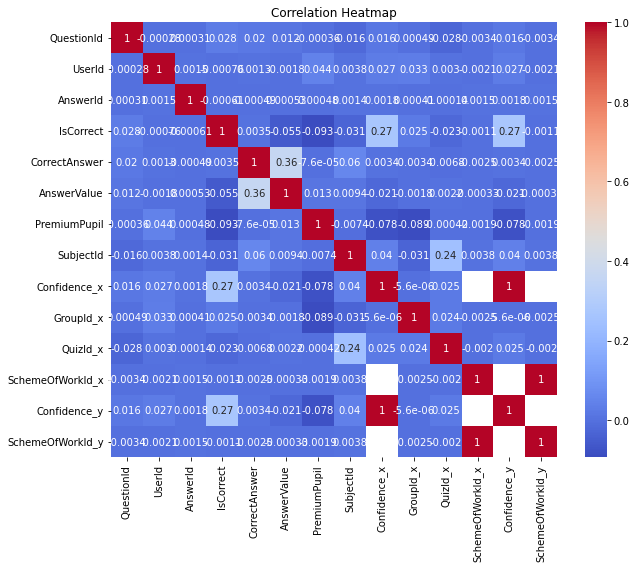

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [167]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


In [ ]:
correlation_matrix2 = eval_validation.corr()
correlation_with_target = correlation_matrix['IsCorrect'].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    25 non-null     int64  
 1   Unnamed: 0.1  25 non-null     int64  
 2   left          25 non-null     int64  
 3   right         25 non-null     int64  
 4   T1_ALR        25 non-null     int64  
 5   T2_CL         25 non-null     int64  
 6   T3_GF         25 non-null     int64  
 7   T4_MQ         25 non-null     float64
 8   T5_NS         25 non-null     int64  
 9   score         25 non-null     float64
 10  preference    25 non-null     int32  
dtypes: float64(2), int32(1), int64(8)
memory usage: 2.2 KB


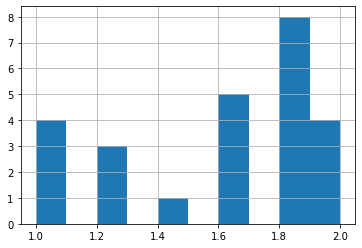

In [199]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()
eval_validation.info()

<AxesSubplot:>

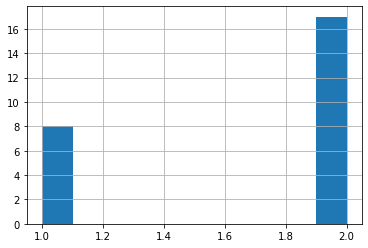

In [176]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    a = list(preference)
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
eval_validation['preference'].hist()

In [178]:
print(a)

                                     0
QuestionId       QuestionId        1.0
AnswerId         AnswerId          1.0
SchemeOfWorkId_y SchemeOfWorkId_x  1.0
Confidence_y     Confidence_y      1.0
                 Confidence_x      1.0
...                                ...
SchemeOfWorkId_x Confidence_y      NaN
Confidence_y     SchemeOfWorkId_x  NaN
                 SchemeOfWorkId_y  NaN
SchemeOfWorkId_y Confidence_x      NaN
                 Confidence_y      NaN

[196 rows x 1 columns]


In [15]:
eval_test = pd.read_csv('test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0,Unnamed: 0.1,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    25 non-null     int64  
 1   Unnamed: 0.1  25 non-null     int64  
 2   left          25 non-null     int64  
 3   right         25 non-null     int64  
 4   T1_ALR        25 non-null     int64  
 5   T2_CL         25 non-null     int64  
 6   T3_GF         25 non-null     int64  
 7   T4_MQ         24 non-null     float64
 8   T5_NS         25 non-null     int64  
 9   score         25 non-null     float64
dtypes: float64(2), int64(8)
memory usage: 2.1 KB


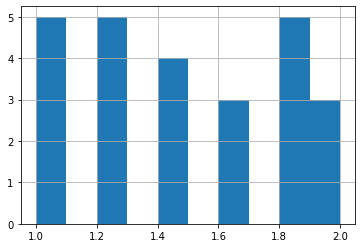

In [200]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()
eval_test.info()

In [179]:
from itertools import combinations

In [180]:
train_data3.head()

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,Gender,DateOfBirth,PremiumPupil,SubjectId,Confidence_x,GroupId_x,QuizId_x,SchemeOfWorkId_x,Confidence_y,GroupId_y,QuizId_y,SchemeOfWorkId_y
0,898,2111,280203,1,2,2,2,2007-09-01,0.0,29,NaN,95,86,52562.0,NaN,95,86,52562.0
1,298,3912,578636,1,3,3,2,2008-04-01,0.0,40,NaN,314,78,52562.0,NaN,314,78,52562.0
2,134,5163,1042162,0,1,2,1,2008-07-01,0.0,22,NaN,163,46,52562.0,NaN,163,46,52562.0
3,840,3896,150788,0,1,2,2,2008-06-01,1.0,7,NaN,370,66,52562.0,NaN,370,66,52562.0
4,264,5047,67204,1,3,3,2,2007-12-01,0.0,55,NaN,254,105,52562.0,NaN,254,105,52562.0


In [182]:
template = pd.read_csv('template.csv')
len(template)

948

In [183]:
template.head()

,QuestionId,Ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [184]:
template['ranking'] = 1

In [188]:
df = pd.read_csv('train_data/train_task_3_4.csv')

In [189]:
from sklearn.ensemble import RandomForestRegressor

X_train = df.drop(['QuestionId', 'IsCorrect'], axis=1) 
y_train = df['IsCorrect']  


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [ 5, 10],
    'min_samples_split': [ 5, 10]
}
# Create the RandomForestRegressor model
model = RandomForestRegressor()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [194]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [196]:
y_pred = model.predict(X_train)

In [197]:
y_pred

array([1.  , 1.  , 0.99, ..., 1.  , 0.  , 1.  ])

In [ ]:
submission_df = df[['QuestionId']].copy()
submission_df['score'] = y_pred

In [ ]:
submission_df.sort_values(by='score', ascending=False, inplace=True)
submission_df.drop_duplicates(subset='QuestionId', keep='first', inplace=True)
submission_df['rank'] = range(1, len(submission_df) + 1)

In [203]:
submission_df = pd.duplicates
print(submission_df[['QuestionId', 'rank']])

        QuestionId     rank
0              898        1
695836         461        2
695827         392        3
695828         278        4
695829         135        5
...            ...      ...
856673         560  1382723
413968         193  1382724
413967         565  1382725
856676          46  1382726
352386         276  1382727

[1382727 rows x 2 columns]


In [ ]:
def evaluate(truth, submission):
    submission_preference = []
    for idx, row in truth.iterrows():
        left_question_id = row['left']
        right_question_id = row['right']
        left_rank = submission.loc[submission['QuestionId'] == left_question_id, 'rank'].values[0]
        right_rank = submission.loc[submission['QuestionId'] == right_question_id, 'rank'].values[0]
        
        preference = 1 if left_rank < right_rank else 2
        submission_preference.append(preference)
    
    return submission_preference